# Final Project(Part B): Airbnb Customer Churn Prediction

### Importing necessary libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [33]:
df = pd.read_csv('airbnb_customer_data.csv')  

# Display basic dataset information
print("Dataset Overview:")
print(df.head())
print("\nColumn Data Types:")
print(df.dtypes)

Dataset Overview:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies   

### Handle Missing Values

In [57]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric
df.fillna(df['TotalCharges'].median(), inplace=True)  # Fill missing values with median
# Verify Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Encode categorical variables

In [27]:

label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
              'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

### Feature selection and scaling

In [28]:

X = df.drop(columns=['customerID', 'Churn'])  # Features
y = df['Churn']  # Target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split data into training and testing sets

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### Hyperparameter tuning using GridSearchCV

In [30]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [31]:
# Best model
best_model = grid_search.best_estimator_
# Make predictions
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

### Evaluate the model

In [32]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 0.7956
Precision: 0.6443
Recall: 0.5134
F1 Score: 0.5714

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### Plot Confusion Matrix

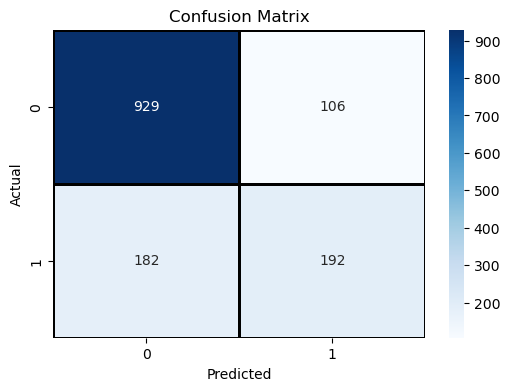

In [33]:

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Churn Data Insights using Graphs

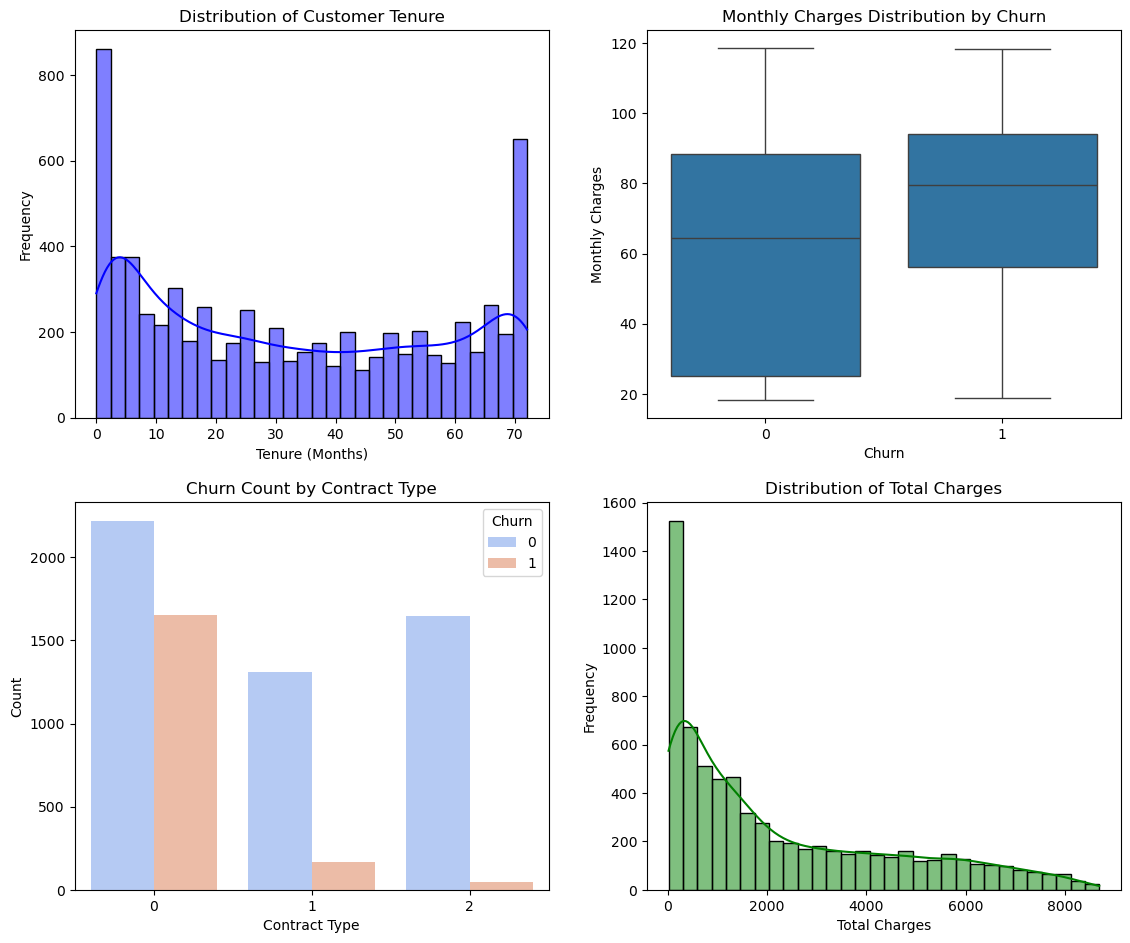

In [53]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout(pad=4)

sns.histplot(df['tenure'], kde=True, bins=30, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Customer Tenure')
axes[0, 0].set_xlabel('Tenure (Months)')
axes[0, 0].set_ylabel('Frequency')

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Monthly Charges Distribution by Churn')
axes[0, 1].set_xlabel('Churn')
axes[0, 1].set_ylabel('Monthly Charges')

sns.countplot(x='Contract', hue='Churn', data=df, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Churn Count by Contract Type')
axes[1, 0].set_xlabel('Contract Type')
axes[1, 0].set_ylabel('Count')

sns.histplot(df['TotalCharges'], kde=True, bins=30, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Total Charges')
axes[1, 1].set_xlabel('Total Charges')
axes[1, 1].set_ylabel('Frequency')

plt.show()

### Save the model and scaler

In [35]:

import joblib
joblib.dump(best_model, "customer_churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

## Video Explanation

### https://drive.google.com/file/d/1amMDOroiwMlTDUCtxfDhycK8HljrmYBb/view?usp=drive_link